/Users/vaibhavkejriwal/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/vaibhavkejriwal/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:184: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


Average Expected Risk 0.3244031178791402
[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.        ]
 [0.         0.         0.         1.         0.         0.
  0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.18867925 0.01908957
  0.01567398 0.00502513 0.         0.         0.        ]
 [0.         0.         0.         0.         0.43396226 0.6328928
  0.22100313 0.02512563 0.         0.         0.        ]
 [0.         0.         0.         0.         0.33962264 0.32599119
  0.64733542 0.44723618 0.16666667 0.         0.        ]
 [0.         0.         0.         0.         0.03773585 0.02202643
  0.09717868 0.45226131 0.         0.     

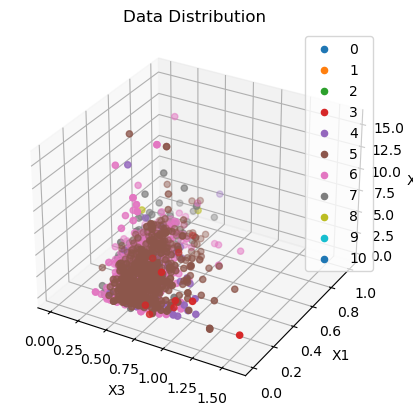

In [90]:
import random
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
from numpy import linalg as LA

# Import Dataset
df = pd.read_csv('/Users/vaibhavkejriwal/Desktop/Python/winequality-red.csv')
Data = df.to_numpy()

N = Data.shape[0]       # Number of Samples
label = Data[:, 11]     # Seperate column containing class labels
Data = Data[:, 0:11]    # Feature set
N_labels = 11           # Number of classes
N_features = 11         # Number of features
mean_matrix = np.zeros(shape = [N_labels, N_features])
covariance_matrix = np.zeros(shape = [N_labels, N_features, N_features])

# Compute Mean Vectors and Covariance matrices
for i in range(0, N_labels):
    mean_matrix[i, :] = np.mean(Data[(label == i)], axis = 0)
    # Identity covariance matrix for labels not in dataset 
    if (i not in label):
        covariance_matrix[i, :, :] = np.eye(N_features)
    else:
        covariance_matrix[i, :, :] = np.cov(Data[(label == i), :], rowvar = False)
        covariance_matrix[i, :, :] += (0.000000005) * ((np.trace(covariance_matrix[i, :, :]))/LA.matrix_rank(covariance_matrix[i, :, :])) * np.eye(N_features)
    #Check if covariance matrices are ill-conditioned
    #print(LA.cond(covariance_matrix[i,:,:]))

# Assign 0-1 loss matrix
loss_matrix = np.ones(shape = [N_labels, N_labels]) - np.eye(N_labels)

# Compute class conditional PDF
P_x_given_L = np.zeros(shape = [N_labels, N])
for i in range(0, N_labels):
    if i in label:
        P_x_given_L[i, :] = multivariate_normal.pdf(Data, mean = mean_matrix[i, :], cov = covariance_matrix[i, :,:])

# Estimate class priors based on sample count
priors = np.zeros(shape = [11, 1])
for i in range(0, N_labels):
    priors[i] = (np.size(label[np.where((label == i))])) / N

# Compute Class Posteriors using priors and class conditional PDF
P_x = np.matmul(np.transpose(priors), P_x_given_L)
ClassPosteriors = (P_x_given_L * (np.matlib.repmat(priors, 1, N))) / np.matlib.repmat(P_x, N_labels, 1)

# Evaluate Expected risk and decisions based on minimum risk
ExpectedRisk = np.matmul(loss_matrix, ClassPosteriors)
Decision = np.argmin(ExpectedRisk, axis = 0)
print("Average Expected Risk", np.sum(np.min(ExpectedRisk, axis = 0)) / N)

# Estimate Confusion Matrix
ConfusionMatrix = np.zeros(shape = [N_labels, N_labels])
for d in range(N_labels):
    for l in range(N_labels):
        if l in label and d in label:
            ConfusionMatrix[d, l] = (np.size(np.where((d == Decision) & (l == label)))) / np.size(np.where(label == l))

print(ConfusionMatrix)

# Plot Data Distribution
fig = plt.figure()
ax = plt.axes(projection = "3d")
for i in range(N_labels):
    ax.scatter(Data[(label==i),1],Data[(label==i),2],Data[(label==i),3], label=i)
plt.xlabel('X3')
plt.ylabel('X1')
ax.set_zlabel('X2')
ax.legend()
plt.title('Data Distribution')
plt.show()


    

Shape of Data array: (4898, 1)


IndexError: boolean index did not match indexed array along dimension 0; dimension is 11 but corresponding boolean dimension is 1